In [1]:
import numpy as np

In [2]:
# Импортируем библиотеку matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from math import sqrt

In [4]:
import sympy as sp

In [5]:
from sympy.plotting import plot3d

In [6]:
from sympy.plotting.plot import MatplotlibBackend, Plot

In [7]:
u1 = sp.symbols("u1")

In [8]:
u2 = sp.symbols("u2")

In [9]:
f = u1**2 + u1*u2 + u2**2

In [10]:
def dfdu1(f, u1):
    return sp.diff(f, u1)

In [11]:
def dfdu2(f, u2):
    return sp.diff(f, u2)

In [12]:
def norm_grad(grad, u1, u2, u01, u02):
    s = 0
    for d in grad:
        s += d.subs([(u1, u01), (u2, u02)])**2
    return sqrt(s)

In [13]:
eps = 10**(-3)

In [14]:
u01 = 1

In [15]:
u02 = 0

In [18]:
def gradient_descent(ui1, ui2, k):
    F = u1**2 + u1*u2 + u2**2 + k*(u1 + u2 - 2)**2
    
    u01 = ui1
    u02 = ui2
    
    H = sp.hessian(F, [u1, u2]).subs([(u1, u01), (u2, u02)])
    
    max_iterations = 1000
    
    exit = False
    iteration = 0
    while not exit:
        iteration += 1
        
        u0 = sp.Matrix([[u01, u02]])
        gradient = lambda f, v: sp.Matrix([f]).jacobian(v)
        grad = gradient(F, [u1, u2])
        ui = u0 - grad.subs([(u1, u0[0]), (u2, u0[1])])*(H.inv())
     
        if norm_grad(grad, u1, u2, ui[0], ui[1]) < eps:
            exit = True
            break
            
        if iteration >= max_iterations:
            break
            
        u01 = ui1
        u02 = ui2
                
    F0 = F.subs({u1: ui[0], u2: ui[1]})           
    return float(ui[0]), float(ui[1]), float(F0)

In [25]:
for k in range(0, 500, 10):
    u1_res, u2_res, F_res = gradient_descent(u01, u02, k)
    print(f"k={k}, u*=({u1_res}, {u2_res}), F(u*)={F_res}")

k=0, u*=(0.0, 0.0), F(u*)=0.0
k=10, u*=(0.9302325581395349, 0.9302325581395349), F(u*)=2.7906976744186047
k=20, u*=(0.963855421686747, 0.963855421686747), F(u*)=2.891566265060241
k=30, u*=(0.975609756097561, 0.975609756097561), F(u*)=2.926829268292683
k=40, u*=(0.9815950920245399, 0.9815950920245399), F(u*)=2.9447852760736195
k=50, u*=(0.9852216748768473, 0.9852216748768473), F(u*)=2.955665024630542
k=60, u*=(0.9876543209876543, 0.9876543209876543), F(u*)=2.962962962962963
k=70, u*=(0.9893992932862191, 0.9893992932862191), F(u*)=2.9681978798586575
k=80, u*=(0.9907120743034056, 0.9907120743034056), F(u*)=2.972136222910217
k=90, u*=(0.9917355371900827, 0.9917355371900827), F(u*)=2.975206611570248
k=100, u*=(0.9925558312655087, 0.9925558312655087), F(u*)=2.977667493796526
k=110, u*=(0.9932279909706546, 0.9932279909706546), F(u*)=2.979683972911964
k=120, u*=(0.9937888198757764, 0.9937888198757764), F(u*)=2.981366459627329
k=130, u*=(0.994263862332696, 0.994263862332696), F(u*)=2.9827915869

In [26]:
def get_sympy_subplots(plot:Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.plt

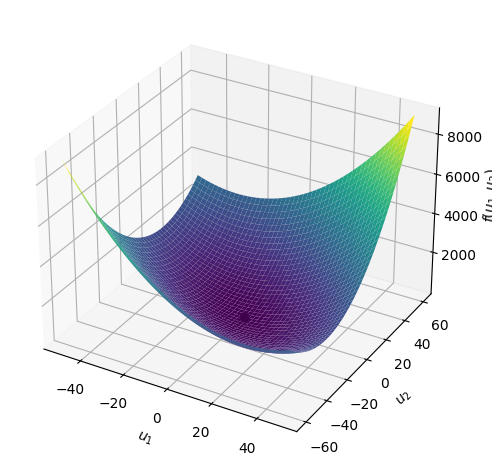

In [27]:
p = plot3d(f, (u1, -50, 50), (u2, -60, 60), show=False)
plt = get_sympy_subplots(p)
plt.plot(u1_res, u2_res, F_res, 'o', color='k')